<a href="https://colab.research.google.com/github/swarghade/Credit-Card-Approval-Prediction/blob/main/Credit_Card_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

LOADING DATASET

In [ ]:
df_application = pd.read_csv("/content/sample_data/application_record.csv")


In [ ]:
df_credit = pd.read_csv("/content/sample_data/credit_record.csv")


DATA UNDERSTANDING

In [ ]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [ ]:
  df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Summary statistics for a the dataframe

In [ ]:
df_application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
df_credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [ ]:
df_application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
#Dropping OCCUPATION_TYPE because of inconsistent null data
df_application.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [ ]:
df_credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
len(df_application['ID']) - len(df_application['ID'].unique())

47

In [ ]:
#dropping duplicates by ID
df_application = df_application.drop_duplicates('ID', keep='last')

In [ ]:
# if 'DAYS_EMPLOYED' > 0 (the customer is unemployed) replace with 0
df_application[df_application['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()
df_application['DAYS_EMPLOYED'].replace(365243,0, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_application.drop('FLAG_MOBIL', axis=1, inplace = True)
#Dropping Flag_work_phone,Flag_phone,Flag_email
df_application.drop('FLAG_WORK_PHONE', axis=1, inplace = True)
df_application.drop('FLAG_EMAIL', axis=1, inplace = True)
df_application.drop('FLAG_PHONE', axis=1, inplace = True)

In [ ]:
#converting the age by days to age by years
df_application['DAYS_BIRTH'] = round(df_application['DAYS_BIRTH']/-365,0)
df_application.rename(columns={'DAYS_BIRTH':'AGE'}, inplace=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,-4542,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,-4542,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,-1134,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,1.0


In [ ]:
df_application.replace({'CODE_GENDER': {'M':0, 'F':1}},inplace= True)


In [ ]:
df_application.replace({'FLAG_OWN_CAR': {'Y':0, 'N':1}},inplace= True)

In [ ]:
df_application.replace({'FLAG_OWN_REALTY': {'Y':0, 'N':1}},inplace= True)

In [ ]:
df_application.NAME_INCOME_TYPE.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df_application.replace({'NAME_INCOME_TYPE': {'Working':0, 'Commercial associate':1, 'Pensioner': 2, 'State servant':3,'Student':4 }},inplace= True)

In [ ]:
df_application.NAME_EDUCATION_TYPE.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
df_application.replace({'NAME_EDUCATION_TYPE': {'Higher education':0, 'Secondary / secondary special':1, 'Incomplete higher': 2, 'Lower secondary':3,'Academic degree':4}},inplace= True)

In [ ]:
df_application.NAME_FAMILY_STATUS.unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df_application.replace({'NAME_FAMILY_STATUS': {'Civil marriage':0, 'Married':1, 'Single / not married': 2, 'Separated':3,'Widow':4 }},inplace= True)

In [ ]:
df_application.NAME_HOUSING_TYPE.unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df_application.replace({'NAME_HOUSING_TYPE': {'Rented apartment':0, 'House / apartment':1, 'Municipal apartment': 2, 'With parents':3,'Co-op apartment':4,'Office apartment':5}},inplace= True)

In [ ]:
#  Replace C and X with 0, expanding the 0 group to 0-29 days past due, so that we have all numeric categories for delinquency status.
#df_credit.replace({'STATUS': {'C':0, 'X':0,'1':0,'2':1,'3':1,'4':1,'5':1}},inplace= True)

In [ ]:
df_with_duplicates = pd.merge(df_application,df_credit,how='inner',on='ID')

In [ ]:
df = df_with_duplicates.dropna().drop_duplicates(subset='ID', keep='first')

In [ ]:
print('The shape of the cleaned data set is ' + str(df.shape) +'.')

The shape of the cleaned data set is (36457, 15).


AGE VS CUSTOMER FREQUENCY

(20.951, 25.8]     951
(25.8, 30.6]      4575
(30.6, 35.4]      4990
(35.4, 40.2]      5399
(40.2, 45.0]      4996
(45.0, 49.8]      3374
(49.8, 54.6]      4034
(54.6, 59.4]      3870
(59.4, 64.2]      3254
(64.2, 69.0]      1014
Name: AGE, dtype: int64


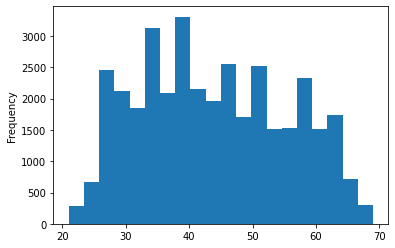

In [ ]:
print(df['AGE'].value_counts(bins=10,normalize=False,sort=False))
df['AGE'].plot(kind='hist',bins=20,density=False)

Employment time VS Customer Frequency

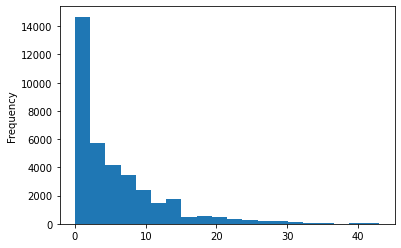

In [ ]:
df['Employed']=-(df['DAYS_EMPLOYED'])//365
df[df['Employed']<0] = np.nan # replace by na
df['DAYS_EMPLOYED']
df['Employed'].fillna(df['Employed'].mean(),inplace=False) #replace na by mean
df['Employed'].plot(kind='hist',bins=20,density=False)

In [ ]:
PeopleNoLoans = (df.loc[df['STATUS'] == 'X'].shape[0]/df.shape[0]) * 100
print(str(round(PeopleNoLoans, 2)) + "% of people have no loans.")

26.52% of people have no loans.


In [ ]:
LoanPaidOff = (df.loc[df['STATUS'] == 'C'].shape[0]/df.shape[0]) * 100
print(str(round(LoanPaidOff, 2)) + "% of customers have paid off there dues.")

49.24% of customers have paid off there dues.


In [ ]:
defaulters= ['0','1','2','3','4','5']

In [ ]:
df['OverDues'] = np.where(df.STATUS.isin(defaulters), 1, 0)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Employed,OverDues
0,5008804.0,0.0,0.0,0.0,0.0,427500.0,0.0,0.0,0.0,0.0,33.0,-4542.0,2.0,0.0,C,12.0,0
16,5008805.0,0.0,0.0,0.0,0.0,427500.0,0.0,0.0,0.0,0.0,33.0,-4542.0,2.0,0.0,C,12.0,0
31,5008806.0,0.0,0.0,0.0,0.0,112500.0,0.0,1.0,1.0,1.0,59.0,-1134.0,2.0,0.0,C,3.0,0
61,5008808.0,1.0,1.0,0.0,0.0,270000.0,1.0,1.0,2.0,1.0,52.0,-3051.0,1.0,0.0,0,8.0,1
66,5008809.0,1.0,1.0,0.0,0.0,270000.0,1.0,1.0,2.0,1.0,52.0,-3051.0,1.0,-22.0,X,8.0,0


Text(0, 0.5, 'Number of Customers')

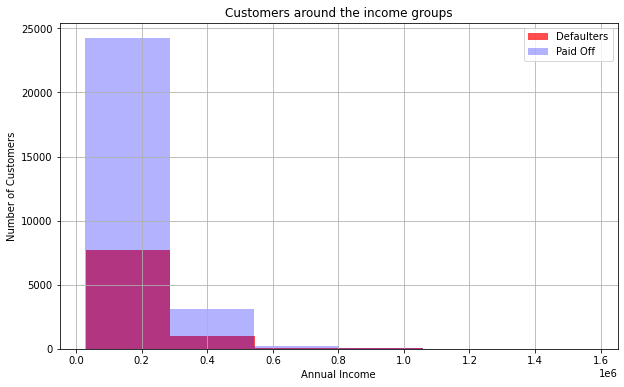

In [ ]:
plt.figure(figsize=(10,6))
df[df['OverDues']==1]['AMT_INCOME_TOTAL'].hist(alpha=0.7,color='Red', bins=6,label='Defaulters')
df[df['OverDues']==0]['AMT_INCOME_TOTAL'].hist(alpha=0.3,color='Blue', bins=6,label='Paid Off')
                                                    
plt.title('Customers around the income groups')                                                    
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')

In [ ]:
df['OverDues'].value_counts()

0    27619
1     8838
Name: OverDues, dtype: int64

([<matplotlib.axis.XTick at 0x7f8756de7f90>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

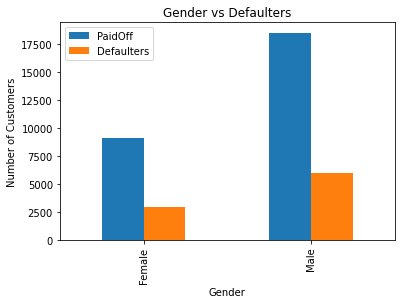

In [ ]:
pd.crosstab(df.CODE_GENDER,df.OverDues).plot(kind='bar')
plt.title('Gender vs Defaulters')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(labels = ["PaidOff", "Defaulters"])
plt.xticks(np.linspace(0, 1, 2), ['Female','Male'])

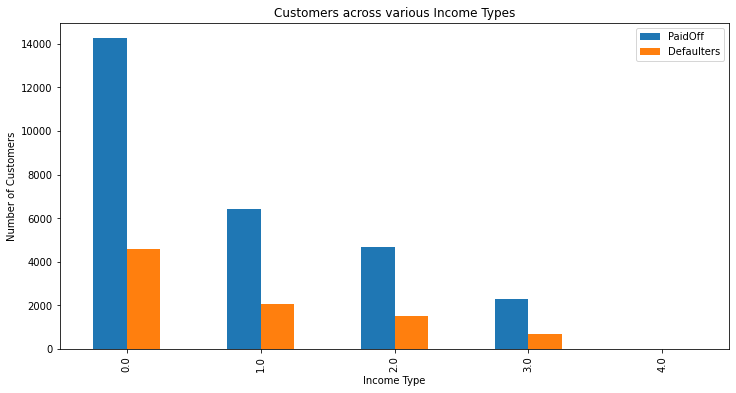

In [ ]:
# 'Working':0, 'Commercial associate':1, 'Pensioner': 2, 'State servant':3,'Student':4 
pd.crosstab(df.NAME_INCOME_TYPE, df.OverDues).plot(kind='bar', figsize=(12,6))
plt.title('Customers across various Income Types')
plt.xlabel('Income Type')
plt.ylabel('Number of Customers')
plt.legend(labels = ["PaidOff", "Defaulters"])

FINAL DF FOR ML IMPLEMENTATION

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Employed,OverDues
0,5008804.0,0.0,0.0,0.0,0.0,427500.0,0.0,0.0,0.0,0.0,33.0,-4542.0,2.0,0.0,C,12.0,0
16,5008805.0,0.0,0.0,0.0,0.0,427500.0,0.0,0.0,0.0,0.0,33.0,-4542.0,2.0,0.0,C,12.0,0
31,5008806.0,0.0,0.0,0.0,0.0,112500.0,0.0,1.0,1.0,1.0,59.0,-1134.0,2.0,0.0,C,3.0,0
61,5008808.0,1.0,1.0,0.0,0.0,270000.0,1.0,1.0,2.0,1.0,52.0,-3051.0,1.0,0.0,0,8.0,1
66,5008809.0,1.0,1.0,0.0,0.0,270000.0,1.0,1.0,2.0,1.0,52.0,-3051.0,1.0,-22.0,X,8.0,0


In [ ]:
df.STATUS.unique()

array(['C', '0', 'X', '1', '5', '3', '4', '2'], dtype=object)

In [ ]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
Employed               0
OverDues               0
dtype: int64

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS', 'Employed', 'OverDues'],
      dtype='object')

In [ ]:
df.replace({'STATUS': {'C':0, 'X':0,'1':1,'2':2,'3':3,'4':4,'5':5}},inplace= True)

In [ ]:
df.replace({'NAME_HOUSING_TYPE': {0:0, 1:1, 2: 1, 3:2,4:1,5:1}},inplace= True)

In [ ]:
#Features Selected
col_names = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'DAYS_EMPLOYED','CNT_FAM_MEMBERS', 'MONTHS_BALANCE','STATUS']

In [ ]:
df['STATUS'] = pd.to_numeric(df['STATUS'])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
X = df[col_names] # Features
y = df.OverDues # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  float64
 1   CODE_GENDER          36457 non-null  float64
 2   FLAG_OWN_CAR         36457 non-null  float64
 3   FLAG_OWN_REALTY      36457 non-null  float64
 4   CNT_CHILDREN         36457 non-null  float64
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  float64
 7   NAME_EDUCATION_TYPE  36457 non-null  float64
 8   NAME_FAMILY_STATUS   36457 non-null  float64
 9   NAME_HOUSING_TYPE    36457 non-null  float64
 10  AGE                  36457 non-null  float64
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  MONTHS_BALANCE       36457 non-null  float64
 14  STATUS               36457 non-null  int64  
 15  Employed             36457 non-null

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7328579264947888


[[7141 1214]
 [1708  875]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8355
           1       0.42      0.34      0.37      2583

    accuracy                           0.73     10938
   macro avg       0.61      0.60      0.60     10938
weighted avg       0.72      0.73      0.72     10938

      0     1
0  7141  1214
1  1708   875


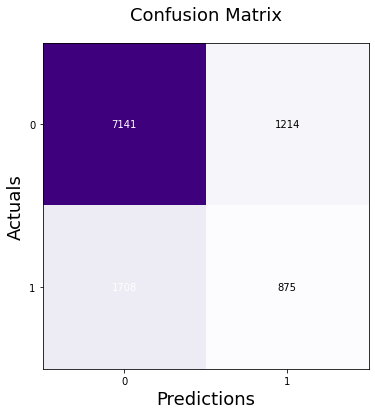

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


from mlxtend.plotting import plot_confusion_matrix
confus_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=confus_matrix, figsize=(6, 6), cmap=plt.cm.Purples, )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Xgboost for Decision Tree
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test)*100, '%')


XGBoost Model Accuracy :  77.43646004754068 %


In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Card.png')
Image(graph.create_png())

**KNN**

Standardizing Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('OverDues',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('OverDues',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [ ]:
df_feat.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Employed
0,-1.657876,-1.425224,-1.278126,-0.698338,-0.579661,2.365845,-0.824767,-1.410711,-1.507027,-4.102286,-0.935614,-0.989403,-0.217680,0.514889,-0.078728,0.995091
1,-1.657852,-1.425224,-1.278126,-0.698338,-0.579661,2.365845,-0.824767,-1.410711,-1.507027,-4.102286,-0.935614,-0.989403,-0.217680,0.514889,-0.078728,0.995091
2,-1.657828,-1.425224,-1.278126,-0.698338,-0.579661,-0.728827,-0.824767,0.372153,-0.341601,-0.130831,1.321517,0.450538,-0.217680,0.514889,-0.078728,-0.407447
3,-1.657780,0.701644,0.782396,-0.698338,-0.579661,0.818509,0.184481,0.372153,0.823825,-0.130831,0.713828,-0.359429,-1.314564,0.514889,-0.078728,0.371741
4,-1.657756,0.701644,0.782396,-0.698338,-0.579661,0.818509,0.184481,0.372153,0.823825,-0.130831,0.713828,-0.359429,-1.314564,-1.427487,-0.078728,0.371741


Training Dataset and applying KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = df_feat
y = df['OverDues']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10086)


In [ ]:
#kNN 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_test)

In [ ]:
class_names = ['0','1']

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(pd.DataFrame(confusion_matrix(y_test,pred)))


[[7472  846]
 [1955  665]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      8318
           1       0.44      0.25      0.32      2620

    accuracy                           0.74     10938
   macro avg       0.62      0.58      0.58     10938
weighted avg       0.71      0.74      0.72     10938

      0    1
0  7472  846
1  1955  665


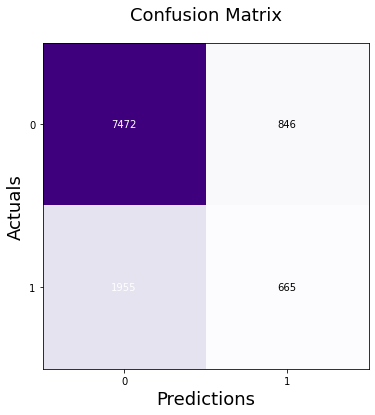

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Purples, )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#xg boost for knn
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test)*100, '%')


XGBoost Model Accuracy :  77.18961418906565 %


**RANDOM FOREST**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

In [ ]:
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)

In [ ]:
print('Random Forest Model Accuracy : ', RandomForest_model.score(X_test, y_test)*100, '%')

Random Forest Model Accuracy :  77.21704150667398 %


In [ ]:
prediction = RandomForest_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))


Confusion matrix :
[[8318    0]
 [2492  128]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8318
           1       1.00      0.05      0.09      2620

    accuracy                           0.77     10938
   macro avg       0.88      0.52      0.48     10938
weighted avg       0.82      0.77      0.68     10938



In [ ]:
confu_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)

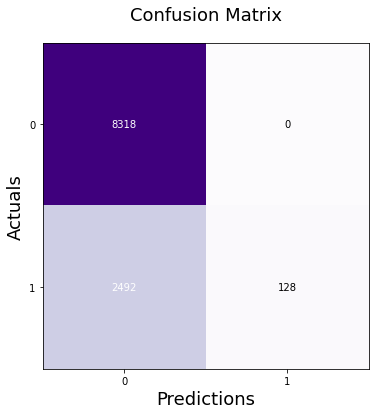

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confu_matrix, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Xg boost for Random Forest 
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test)*100, '%')


XGBoost Model Accuracy :  77.18961418906565 %


**Logistic Regression**

In [ ]:
#Logistic Regression

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state = 10)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain, ytrain)


LogisticRegression()

In [ ]:
print('Logistic Model Accuracy : ', logistic_model.score(xtest, ytest)*100, '%')

prediction = logistic_model.predict(xtest)
print('\nConfusion matrix :')
print(confusion_matrix(ytest, prediction))
      
print('\nClassification report:')      
print(classification_report(ytest, prediction))

Logistic Model Accuracy :  76.34850978240995 %

Confusion matrix :
[[8233    0]
 [2587  118]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8233
           1       1.00      0.04      0.08      2705

    accuracy                           0.76     10938
   macro avg       0.88      0.52      0.47     10938
weighted avg       0.82      0.76      0.67     10938



In [ ]:
confusion_matrix = confusion_matrix(y_true=ytest, y_pred=prediction)

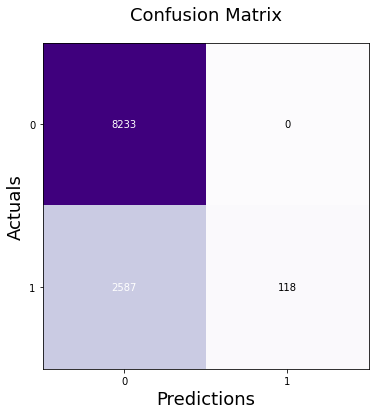

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#xg boost for logistic regression 

from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(xtrain, ytrain)

print('XGBoost Model Accuracy : ', XGB_model.score(xtest, ytest)*100, '%')

prediction = XGB_model.predict(xtest)


XGBoost Model Accuracy :  76.33936734320716 %
